<a href="https://colab.research.google.com/github/biganu/CVIP/blob/main/movie_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the cleaned dataset
df = pd.read_csv('/content/IMDB-Dataset_cleaned.csv')

In [4]:
# Handle missing values by dropping rows with NaN in 'review' or 'sentiment'
df = df.dropna(subset=['review', 'sentiment'])

                                              review sentiment Unnamed: 2  \
0  One of the other reviewers has mentioned that ...  positive        NaN   
1  A wonderful little production. <br /><br />The...  positive        NaN   
2  I thought this was a wonderful way to spend ti...  positive        NaN   
3  Basically there's a family where a little boy ...  negative        NaN   
4  Petter Mattei's "Love in the Time of Money" is...  positive        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  
0        NaN         NaN         NaN         Na

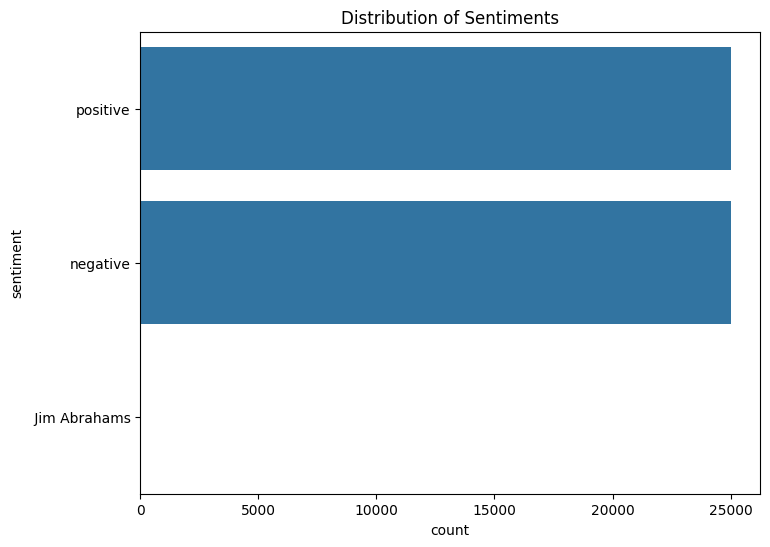

In [5]:
# Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)
plt.figure(figsize=(8, 6))
sns.countplot(df['sentiment'])
plt.title('Distribution of Sentiments')
plt.show()

In [6]:
# Text preprocessing function
def preprocess_text(text):
    # Handle non-string values
    if not isinstance(text, str):
        text = str(text)  # Convert non-string values to strings

    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

In [7]:
# Apply preprocessing to the reviews
df['review'] = df['review'].apply(preprocess_text)

In [8]:
# Convert sentiment labels to binary (0 = negative, 1 = positive)
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

In [9]:
# Drop any rows with NaN values in 'sentiment' after mapping
df = df.dropna(subset=['sentiment'])

In [10]:
# Split the data into training and testing sets
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

In [11]:
# Feature scaling using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
# Initialize and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [13]:
# Make predictions
y_pred = classifier.predict(X_test_vec)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.84299371974879
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84     12499
         1.0       0.85      0.84      0.84     12500

    accuracy                           0.84     24999
   macro avg       0.84      0.84      0.84     24999
weighted avg       0.84      0.84      0.84     24999



In [15]:
# Count positive and negative reviews in the predictions
positive_reviews = sum(y_pred == 1)
negative_reviews = sum(y_pred == 0)
print(f'Positive reviews: {positive_reviews}')
print(f'Negative reviews: {negative_reviews}')

Positive reviews: 12421
Negative reviews: 12578


In [ ]:
#Confusion Matrix

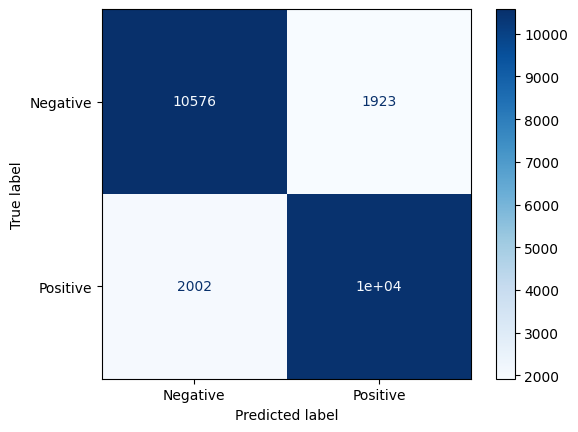

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
#ROC Curve

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'X' is the original text data before splitting
vectorizer = TfidfVectorizer(max_features=5000) # Limit features to 5000 to match training data
X_train_vec = vectorizer.fit_transform(X_train)  # Fit on training data and then transform it
X_test_vec = vectorizer.transform(X_test)  # Transform test data using the same vocabulary as the training data

# Now use the vectorized data for prediction
y_pred_prob = classifier.predict_proba(X_test_vec)[:, 1]

In [ ]:
#Classification Report:

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.84      0.85      0.84     12499
    Positive       0.85      0.84      0.84     12500

    accuracy                           0.84     24999
   macro avg       0.84      0.84      0.84     24999
weighted avg       0.84      0.84      0.84     24999

